# Programming IBM Superconducting Qubits with Qiskit  (Part 1/2)

## Rudy Raymond H.P. (Doctor of Informatics, Kyoto University)

## IBM Research 

Please visit www.qiskit.org for more details on an open source quantum computing framework for writing quantum experiments, programs, and applications.

In [1]:
import slides

Hello Taiwan, Hello NTU, Hello IBM QuaNTUm ... 


In [2]:
slides.ntu()

In [3]:
slides.lab()

In [4]:
slides.system()

In [5]:
slides.transmon()

In [2]:
slides.superposition()


In [6]:
slides.interference()

In [7]:
slides.entangled()

In [8]:
slides.algorithm()

In [9]:
slides.ibmqx()

True

In [10]:
slides.qiskit()

True

In [11]:
slides.elements()

In [12]:
slides.git()

True

In [13]:
from qiskit import IBMQ

import mytoken

IBMQ.delete_accounts()

#public account
IBMQ.save_account(mytoken.PubAPItoken, overwrite=True)

#hub account
config = {
      'url2': 'https://q-console-api.mybluemix.net/api/Hubs/ibm-q-internal/Groups/support/Projects/default'
      }
IBMQ.save_account(mytoken.HubAPItoken, config['url2'], overwrite=True)

In [14]:
IBMQ.load_accounts()
#if there's a trouble see: https://github.com/Qiskit/qiskit-tutorial/blob/master/INSTALL.md

In [15]:
IBMQ.stored_accounts()

[{'token': 'd05e9f4bd7c3c44abc479d5024349ae556b78df9dd26fc09bdae0ab12e432fd29da1ac218d0513408764fce1182d404de91e1fa4ca3f59c17da9ae5615e159e2',
  'url': 'https://quantumexperience.ng.bluemix.net/api'},
 {'token': '30f9bee04302e1fa543880f72635b525f1e70ed212e43abd3a280f37ad3c2a44b8db13c57b8410da5bdabe26dc49296586745e41c46b1a215408ae31492c53fb',
  'url': 'https://q-console-api.mybluemix.net/api/Hubs/ibm-q-internal/Groups/support/Projects/default'}]

In [16]:
IBMQ.backends()

[<IBMQBackend('ibmqx4') from IBMQ()>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ()>,
 <IBMQBackend('ibmq_qasm_simulator') from IBMQ()>,
 <IBMQBackend('ibmq_20_tokyo') from IBMQ(ibm-q-internal, support, default)>,
 <IBMQBackend('ibmq_poughkeepsie') from IBMQ(ibm-q-internal, support, default)>,
 <IBMQBackend('ibmq_qasm_simulator') from IBMQ(ibm-q-internal, support, default)>]

In [17]:
IBMQ.backends(n_qubits=20)

[<IBMQBackend('ibmq_20_tokyo') from IBMQ(ibm-q-internal, support, default)>,
 <IBMQBackend('ibmq_poughkeepsie') from IBMQ(ibm-q-internal, support, default)>]

In [6]:
from qiskit.providers.ibmq import least_busy
least_busy(IBMQ.backends(n_qubits=20))

<IBMQBackend('ibmq_20_tokyo') from IBMQ(ibm-q-internal, support, default)>

In [32]:
for backend in IBMQ.backends(simulator=False):
    print(backend.status())

BackendStatus(backend_name='ibmqx4', backend_version='1.0.0', operational=True, pending_jobs=28, status_msg='active')
BackendStatus(backend_name='ibmq_16_melbourne', backend_version='1.0.0', operational=True, pending_jobs=68, status_msg='calibrating')
BackendStatus(backend_name='ibmq_20_tokyo', backend_version='1.0.0', operational=True, pending_jobs=0, status_msg='active')
BackendStatus(backend_name='ibmq_poughkeepsie', backend_version='1.0.0', operational=True, pending_jobs=0, status_msg='active')


In [19]:
slides.ibmq_qcc()

In [20]:
slides.quantum()

thanks omgcatsinspace for the permission to use the quantum cat

In [21]:
slides.model()

In [22]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute
from qiskit.tools.visualization import plot_histogram
from qiskit import BasicAer as Aer

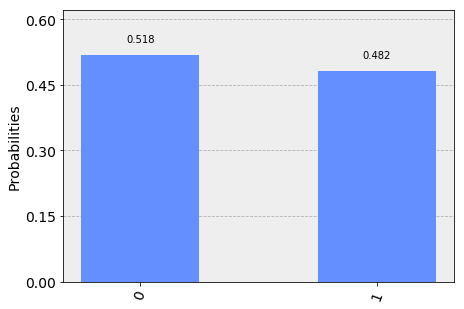

In [23]:
# Quantum and Classical Registers
q = QuantumRegister(1)
c = ClassicalRegister(1)

# Build the circuit
qc = QuantumCircuit(q, c)
qc.h(q)

#-----

qc.measure(q, c)

# Execute the circuit
sim_backend = Aer.get_backend('qasm_simulator')
result = execute(qc, sim_backend, shots=1000).result()

# Display the result
plot_histogram(result.get_counts(qc))

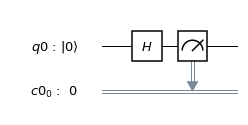

In [24]:
qc.draw(output="mpl")

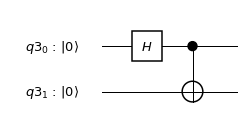

In [27]:
# Quantum Registers
q = QuantumRegister(2)

# Build the circuit
bell = QuantumCircuit(q)
bell.h(q[0])
bell.cx(q[0], q[1])

# Draw the circuit
bell.draw(output="mpl")

In [28]:
c2 = ClassicalRegister(2)

# Measurement in standard basis
meas_zi = QuantumCircuit(q, c) 
meas_zi.measure(q[0], c[0])

# Measurement in superposition basis
meas_xi = QuantumCircuit(q, c)
meas_xi.h(q[0])
meas_xi.measure(q[0], c[0])

# Joint measurement in standard basis
meas_zz = QuantumCircuit(q, c2) 
meas_zz.measure(q, c2)

# Join measuremen xz 
meas_xz = QuantumCircuit(q,c2)
meas_xz.h(q[0])
meas_xz.iden(q[1])
meas_xz.measure(q,c2)

# Joint measurement in superposition basis
meas_xx = QuantumCircuit(q, c2) 
meas_xx.h(q)
meas_xx.measure(q, c2)

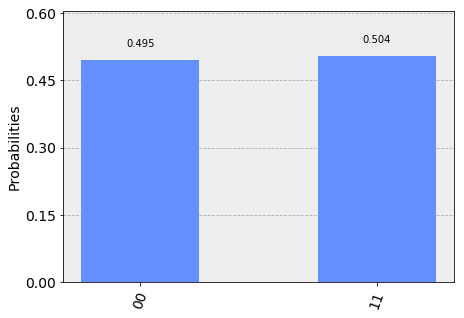

In [34]:
# Execute the circuit
qc = bell + meas_xx
result = execute(qc, sim_backend, shots=10000).result()

# Display the result
plot_histogram(result.get_counts(qc))

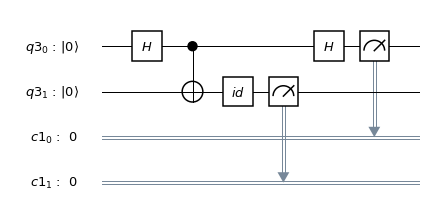

In [31]:
qc.draw(output="mpl")

running it on  ibmq_poughkeepsie


HTML(value="<p style='font-size:16px;'>Job Status: job is being initialized </p>")

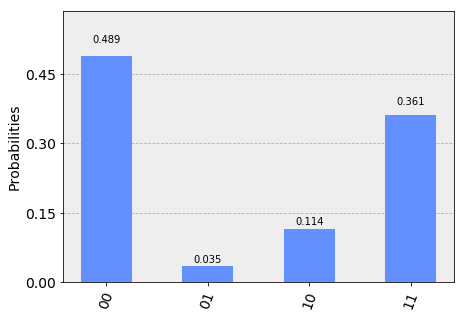

In [33]:
## let's choose a device and 
#device = least_busy(IBMQ.backends(simulator=False, n_qubits=20))
device = IBMQ.get_backend('ibmq_poughkeepsie')
#device = IBMQ.get_backend("ibmqx4")
print('running it on ', device)
qc = bell+meas_xx

from qiskit import execute

job = execute(qc, backend=device, shots=1024)

from qiskit.tools.monitor import job_monitor
job_monitor(job, interval=5)
result = job.result()

    
device_counts = result.get_counts()
plot_histogram(device_counts)

In [35]:
# Build the circuit
superpositon = QuantumCircuit(q) 
oracle = QuantumCircuit(q) 
amplitude_amp = QuantumCircuit(q) 


#Make superposition off all
superpositon.h(q)

#encode the oracle 
test = '01'
if test == '00':
    oracle.z(q)
    oracle.cz(q[0], q[1])   
if test == '10':
    oracle.z(q[1])
    oracle.cz(q[0], q[1])  
if test == '01':
    oracle.z(q[0])
    oracle.cz(q[0], q[1])    
if test == '11':
    oracle.cz(q[0], q[1])


#amplitude amplification
amplitude_amp.h(q)
amplitude_amp.z(q)
amplitude_amp.cz(q[0], q[1])
amplitude_amp.h(q)


grover = superpositon+oracle+amplitude_amp

qc = grover+meas_zz

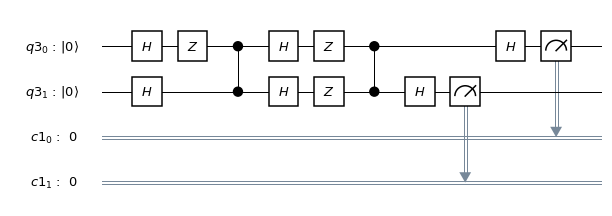

In [36]:
qc.draw(output="mpl")

{'01': 1000}


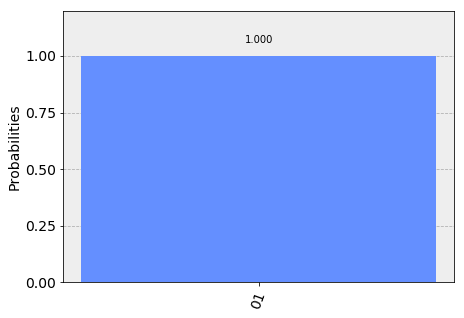

In [37]:
# Execute the circuit
result = execute(qc, backend=sim_backend, shots=1000).result()

print(result.get_counts())
plot_histogram(result.get_counts())

running it on  ibmq_poughkeepsie


HTML(value="<p style='font-size:16px;'>Job Status: job is being initialized </p>")

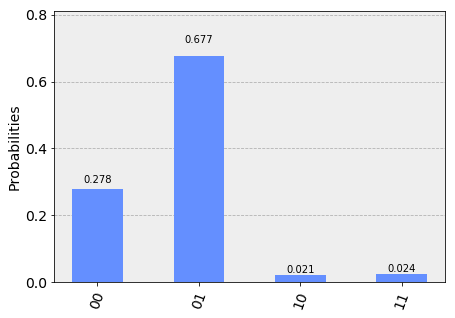

In [29]:
# let's choose a device and 
device = IBMQ.get_backend('ibmq_poughkeepsie')
print('running it on ', device)
qc = grover+meas_zz
job = execute(qc, device)

from qiskit import execute

job = execute(qc, backend=device, shots=1024)

from qiskit.tools.monitor import job_monitor
job_monitor(job)
result = job.result()

counts = result.get_counts()
plot_histogram(counts)

In [25]:
from qiskit.tools.monitor import backend_monitor

backend_monitor(device)

ibmq_poughkeepsie
Configuration
-------------
    n_qubits: 20
    operational: True
    status_msg: active
    pending_jobs: 0
    basis_gates: ['u1', 'u2', 'u3', 'cx', 'id']
    local: False
    simulator: False
    dtm: 3.5555555555555554e-09
    rep_times: [50, 500, 1000]
    backend_version: 1.0.0
    allow_q_object: True
    meas_levels: [1, 2]
    n_registers: 1
    dt: 3.5555555555555554e-09
    online_date: 2018-08-29T04:00:00+00:00
    defaults: {'buffer': 1, 'meas_kernel': {'params': {}, 'name': 'boxcar'}, 'discriminator': {'params': {'cal': 'coloring', 'neighborhoods': [{'qubits': 1, 'channels': 1}, {'qubits': 2, 'channels': 2}, {'qubits': 4, 'channels': 4}, {'qubits': 8, 'channels': 8}, {'qubits': 16, 'channels': 16}, {'qubits': 32, 'channels': 32}, {'qubits': 64, 'channels': 64}, {'qubits': 128, 'channels': 128}, {'qubits': 256, 'channels': 256}, {'qubits': 512, 'channels': 512}, {'qubits': 1024, 'channels': 1024}, {'qubits': 2048, 'channels': 2048}, {'qubits': 4096, 'cha

In [26]:
from qiskit.tools.monitor import backend_overview

backend_overview()

ibmq_poughkeepsie           ibmq_20_tokyo                ibmq_16_melbourne
-----------------           -------------                -----------------
Num. Qubits:  20            Num. Qubits:  20             Num. Qubits:  14
Pending Jobs: 0             Pending Jobs: 0              Pending Jobs: 6
Least busy:   True          Least busy:   False          Least busy:   False
Operational:  True          Operational:  True           Operational:  True
Avg. T1:      69.3          Avg. T1:      92.9           Avg. T1:      54.8
Avg. T2:      59.2          Avg. T2:      57.4           Avg. T2:      75.1



ibmqx4
------
Num. Qubits:  5
Pending Jobs: 13
Least busy:   False
Operational:  True
Avg. T1:      45.9
Avg. T2:      27.4





In [38]:
slides.entangled()

In [39]:
slides.entanglement()

In [40]:
slides.aqua()

In [41]:
slides.execution()

In [42]:
slides.papers()

In [43]:
slides.community()

In [44]:
slides.thanks()

In [ ]:
!pip show qiskit-terra